In [1]:
#IMPORT REQUIRED LIBRARIES# IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

We have imported the required libraries.

In [2]:
# LOADING THE DATASET
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


So we have titatnic dataset in which there are 891 rows and 12 columns.

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

# EDA (EXPLORATORY DATA ANALYSIS)

In [6]:
#STATISTICAL SUMMARY
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This column shows the statistical values for the data like mean,standard deviation and percentiles,minimum and maximum.

In [7]:
#CHECKING DATATYPES
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are all type of data presnet inside the dataset. i.e int,float,object type.

In [8]:
#checking for null values or missing data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


This above code shows only the columns having NaN values.

So,it is obsetved from above observations that there are null values inside the dataset. so we need to replace the missing values with nan. we can also observe null values with visualization library seaborn.

<AxesSubplot:>

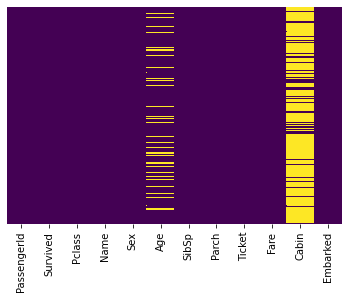

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It is obserbved that almost 20% of the age data is missing out,the proportion of age data is small and almost 80% of the cabin data is missing out which is a large proportion of missed data.

In [11]:
df=df.dropna()

So, here we have dropped the null values and saved the data into the same dataframe which is df.

<AxesSubplot:>

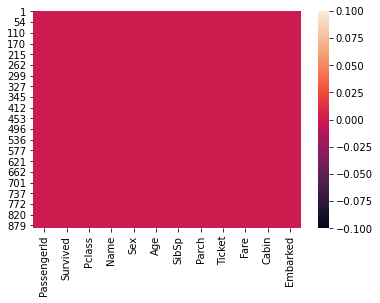

In [12]:
sns.heatmap(df.isnull())

Now, we can seee that there are no null values inside the dataset. we have cleaned the data from null values.

In [13]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


<AxesSubplot:>

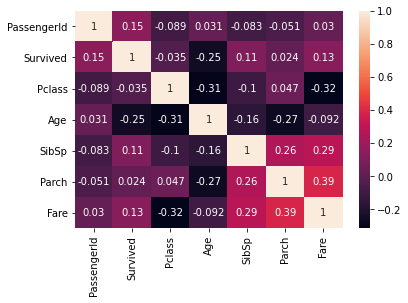

In [14]:
sns.heatmap(df.corr(),annot=True)

From the above heatmap we can conclude that there is a negative correaltion between survived and age column and parch adn fare column are postively correlated. Multicollinearity is not present. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

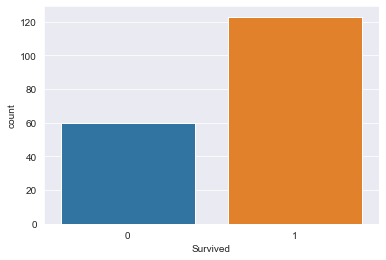

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df)

from the above plot,we can say that approximately 550 passsenger's did not survived in the titanic and around 340 passenger's had survived. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

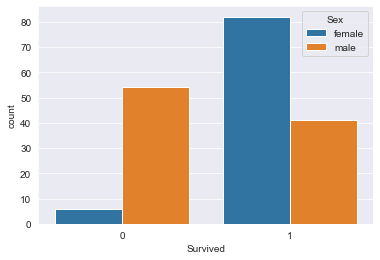

In [16]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df)

This plot shows the survival count of how many males and females have survived or not.So, around 470 male passengers did not survived and around 90 females passengers did not survived. on the other hand, almost 110 male passengers have survived and almost 220 female passengers have survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

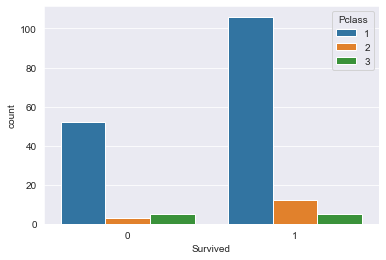

In [17]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

From the above countplot, we can observe that majority of people who did not survived are from pclas-3 and people who survived are from pclass-1.

<AxesSubplot:xlabel='Survived', ylabel='count'>

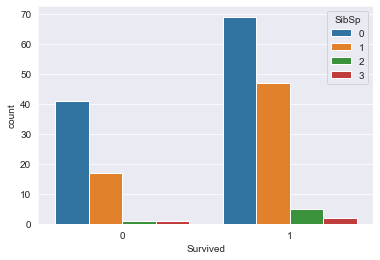

In [18]:
sns.countplot(x='Survived',hue='SibSp',data=df)

This plot explains that the people who are travelling on the titanic are with spouse/siblings and survived or not.So it shows that around 400 people did not survived and they do not have any spouse/sibling similary around more than 200 people have survived and they do not have any spouse/sibling with them. sp like this we can conclude for other observations.


<AxesSubplot:xlabel='Embarked', ylabel='count'>

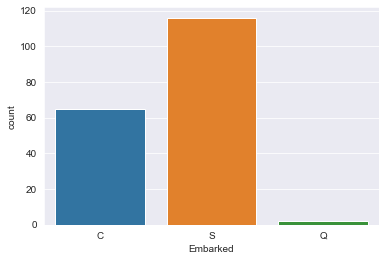

In [19]:
sns.set_style('darkgrid')
sns.countplot(x='Embarked',data=df)

As this column did not explain much about the data so we can drop it ahead.

<AxesSubplot:xlabel='Age', ylabel='Density'>

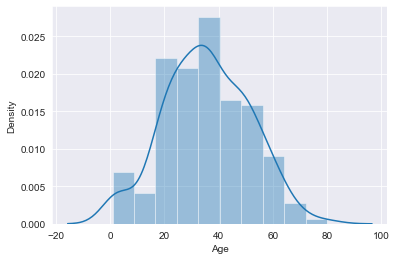

In [20]:
sns.distplot(df['Age'])

from this plot we can observe that most people on the titanic are between the age of 16-30 and less number are people with old age.

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

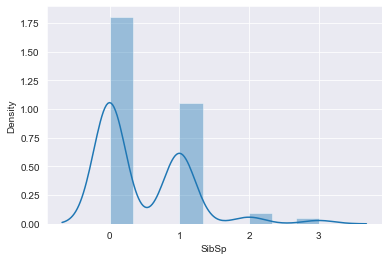

In [21]:
sns.distplot(df['SibSp'])

This plot shows that there are majority of people who are travelling without spouse or sibling, around 200 people are travelling with spouse,aournd 25 are with spouse and sibling and so on.

<AxesSubplot:xlabel='Parch', ylabel='Density'>

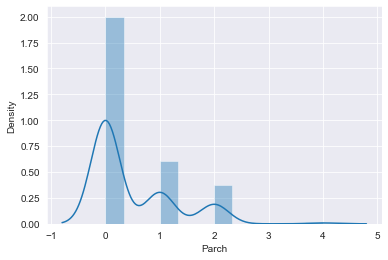

In [22]:
sns.distplot(df['Parch'])

above plot shows the titanic have people who are travelling with there child or parents.In this also around 680 people are travelling alone without any parent or child. more than 100 people are travelling with either parent or child.

<AxesSubplot:xlabel='Survived', ylabel='Density'>

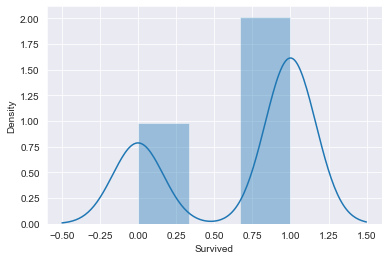

In [23]:
sns.distplot(df['Survived'])

This plot also shows the no of people who survived or not survived.

In [24]:
df.drop(['Ticket','Name','Cabin'],axis=1,inplace=True)

In [25]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542,S
872,873,0,1,male,33.0,0,0,5.0000,S
879,880,1,1,female,56.0,0,1,83.1583,C
887,888,1,1,female,19.0,0,0,30.0000,S


In [26]:
# LABEL ENCODING
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df['Embarked']=lencode.fit_transform(df['Embarked'])

In [27]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0,38.0,1,0,71.2833,0
3,4,1,1,0,35.0,1,0,53.1000,2
6,7,0,1,1,54.0,0,0,51.8625,2
10,11,1,3,0,4.0,1,1,16.7000,2
11,12,1,1,0,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,47.0,1,1,52.5542,2
872,873,0,1,1,33.0,0,0,5.0000,2
879,880,1,1,0,56.0,0,1,83.1583,0
887,888,1,1,0,19.0,0,0,30.0000,2


{'whiskers': [<matplotlib.lines.Line2D at 0x11a6ddd60>,
 'caps': [<matplotlib.lines.Line2D at 0x11a6e9460>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a6dd9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11a6e9b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x11a6e9e80>],
 'means': []}

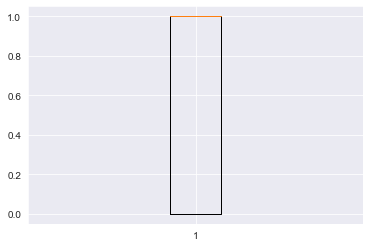

In [29]:
#CHECKING OUTLIERS
plt.boxplot(df['Survived'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11a8193d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11a819a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a819070>],
 'medians': [<matplotlib.lines.Line2D at 0x11a825190>],
 'fliers': [<matplotlib.lines.Line2D at 0x11a8254f0>],
 'means': []}

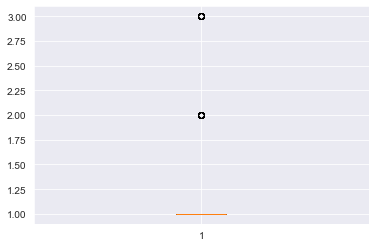

In [30]:
plt.boxplot(df['Pclass'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11a8cd6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x11a8cdc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a8cd3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x11a8d9340>],
 'fliers': [<matplotlib.lines.Line2D at 0x11a8d96a0>],
 'means': []}

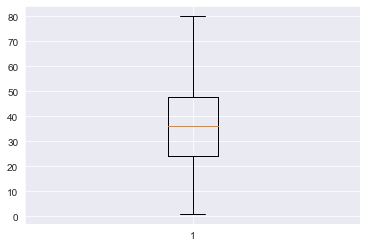

In [31]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11a99c850>,
 'caps': [<matplotlib.lines.Line2D at 0x11a99cf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a99c4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x11a9a8610>],
 'fliers': [<matplotlib.lines.Line2D at 0x11a9a8970>],
 'means': []}

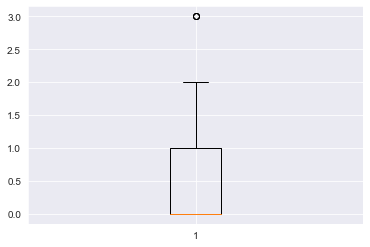

In [32]:
plt.boxplot(df['SibSp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11aa6f130>,
 'caps': [<matplotlib.lines.Line2D at 0x11aa6f7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11aa07d90>],
 'medians': [<matplotlib.lines.Line2D at 0x11aa6feb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11aa7b250>],
 'means': []}

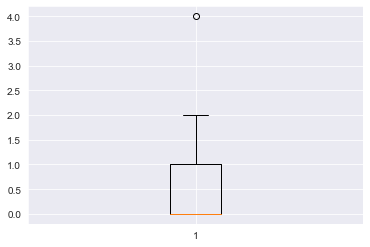

In [33]:
plt.boxplot(df['Parch'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11a17c8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x11a1831f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x119ccc6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x11a22e310>],
 'fliers': [<matplotlib.lines.Line2D at 0x11a22ed60>],
 'means': []}

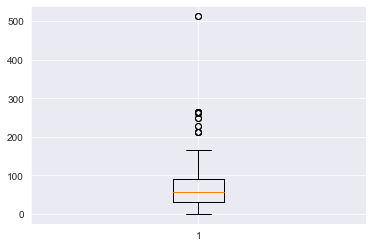

In [34]:
plt.boxplot(df['Fare'])

From the above boxplot for each column we have observed that there are some outliers presnet inside the data so we are noe clean the outliers using the zscore technique.

In [35]:
#REMOVING OUTLIERS USING ZSCORE
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.84013507, 0.6984303 , 0.37225618, ..., 0.63172982, 0.0971798 ,
        1.33939713],
       [1.83201742, 0.6984303 , 0.37225618, ..., 0.63172982, 0.3359971 ,
        0.75555735],
       [1.81984093, 1.43178211, 0.37225618, ..., 0.63172982, 0.35225028,
        0.75555735],
       ...,
       [1.72351585, 0.6984303 , 0.37225618, ..., 0.69708118, 0.05878503,
        1.33939713],
       [1.75598648, 0.6984303 , 0.37225618, ..., 0.63172982, 0.63938976,
        0.75555735],
       [1.76410413, 0.6984303 , 0.37225618, ..., 0.63172982, 0.63938976,
        1.33939713]])

looking the code and the output above,it is difficult to say which data pointer is an oulier.lets try and define a threshold to identify an outlier.

In [36]:
threshold=3
print(np.where(z>3))

(array([  3,   7,  12,  13,  34,  42,  71,  80,  82,  86, 137, 142, 148,
       153, 158, 172]), array([2, 5, 2, 5, 2, 2, 5, 2, 2, 6, 7, 2, 2, 7, 2, 2]))


In [37]:
#array 1 is holding the row number and array two is holding the column
z[3][2]

3.5204798366903036

In [38]:
z[7][5]

3.9469712141789386

In [39]:
#IQR SCORE(INTERQUARTILE RANGE)
Q1=df.quantile(0.25)
Q1

PassengerId    263.5
Survived         0.0
Pclass           1.0
Sex              0.0
Age             24.0
SibSp            0.0
Parch            0.0
Fare            29.7
Embarked         0.0
Name: 0.25, dtype: float64

In [40]:
Q3=df.quantile(0.75)
Q3

PassengerId    676.0
Survived         1.0
Pclass           1.0
Sex              1.0
Age             47.5
SibSp            1.0
Parch            1.0
Fare            90.0
Embarked         2.0
Name: 0.75, dtype: float64

In [41]:
IQR=Q3-Q1
IQR

PassengerId    412.5
Survived         1.0
Pclass           0.0
Sex              1.0
Age             23.5
SibSp            1.0
Parch            1.0
Fare            60.3
Embarked         2.0
dtype: float64

In [42]:
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0,38.0,1,0,71.2833,0
3,4,1,1,0,35.0,1,0,53.1000,2
6,7,0,1,1,54.0,0,0,51.8625,2
11,12,1,1,0,58.0,0,0,26.5500,2
21,22,1,2,1,34.0,0,0,13.0000,2
...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,47.0,1,1,52.5542,2
872,873,0,1,1,33.0,0,0,5.0000,2
879,880,1,1,0,56.0,0,1,83.1583,0
887,888,1,1,0,19.0,0,0,30.0000,2


In [43]:
df.shape

(183, 9)

In [44]:
df_new.shape

(167, 9)

In [45]:
#Splitting the independent variables and target
x=df_new.drop('Survived',axis=1)

In [46]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,0,38.0,1,0,71.2833,0
3,4,1,0,35.0,1,0,53.1000,2
6,7,1,1,54.0,0,0,51.8625,2
11,12,1,0,58.0,0,0,26.5500,2
21,22,2,1,34.0,0,0,13.0000,2
...,...,...,...,...,...,...,...,...
871,872,1,0,47.0,1,1,52.5542,2
872,873,1,1,33.0,0,0,5.0000,2
879,880,1,0,56.0,0,1,83.1583,0
887,888,1,0,19.0,0,0,30.0000,2


In [47]:
y=df_new['Survived']

In [48]:
y

1      1
3      1
6      0
11     1
21     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 167, dtype: int64

In [59]:
#training and testing of model
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=146)

In [50]:
xtrain.shape

(133, 8)

In [51]:
ytrain.shape

(133,)

In [52]:
xtest.shape

(34, 8)

In [53]:
ytest.shape

(34,)

In [60]:
#APPLYING ML ALGORITHMS
#LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg=lg.predict(xtest)
print(accuracy_score(ytest,predlg))
print(classification_report(ytest,predlg))
print(confusion_matrix(ytest,predlg))

0.8235294117647058
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.83      0.91      0.87        22

    accuracy                           0.82        34
   macro avg       0.82      0.79      0.80        34
weighted avg       0.82      0.82      0.82        34

[[ 8  4]
 [ 2 20]]


In [61]:
#RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
predrfc=rfc.predict(xtest)
print(accuracy_score(ytest,predrfc))
print(classification_report(ytest,predrfc))
print(confusion_matrix(ytest,predrfc))

0.7647058823529411
              precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           1       0.75      0.95      0.84        22

    accuracy                           0.76        34
   macro avg       0.79      0.69      0.70        34
weighted avg       0.78      0.76      0.74        34

[[ 5  7]
 [ 1 21]]


In [62]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
gnb.score(xtrain,ytrain)
predgnb=gnb.predict(xtest)
print(accuracy_score(ytest,predgnb))
print(confusion_matrix(ytest,predgnb))
print(classification_report(ytest,predgnb))

0.8823529411764706
[[10  2]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.91      0.91      0.91        22

    accuracy                           0.88        34
   macro avg       0.87      0.87      0.87        34
weighted avg       0.88      0.88      0.88        34



In [63]:
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc.score(xtrain,ytrain)
preddtc=dtc.predict(xtest)
print(accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

0.8235294117647058
[[ 6  6]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.79      1.00      0.88        22

    accuracy                           0.82        34
   macro avg       0.89      0.75      0.77        34
weighted avg       0.86      0.82      0.80        34



In [64]:
#SUPPORT VECTOR CLASSIFIER
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc=svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(classification_report(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))

0.6470588235294118
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.65      1.00      0.79        22

    accuracy                           0.65        34
   macro avg       0.32      0.50      0.39        34
weighted avg       0.42      0.65      0.51        34

[[ 0 12]
 [ 0 22]]


Among all the algorithms Gaussian Nb gives the highest accuracy of 88%. so we will go with Gaussian NB algorithm.

In [65]:
# CROSS VALIDATION
scr=cross_val_score(lg,x,y,cv=5)
print('cross validation score of logistic regression is',scr.mean())

cross validation score of logistic regression is 0.7418894830659536


In [66]:
scr2=cross_val_score(rfc,x,y,cv=5)
print('cross validation score of Random forest classifier is',scr2.mean())

cross validation score of Random forest classifier is 0.6638146167557932


In [67]:
scr3=cross_val_score(gnb,x,y,cv=5)
print('cross validation score of Decision Tree classifier is',scr3.mean())

cross validation score of Decision Tree classifier is 0.753832442067736


In [68]:
scr4=cross_val_score(svc,x,y,cv=5)
print('cross validation score of Support Vector classifier is',scr4.mean())

cross validation score of Support Vector classifier is 0.6709447415329769


In [69]:
scr5=cross_val_score(rfc,x,y,cv=5)
print('cross validation score of Gaussian NB is',scr5.mean())

cross validation score of Gaussian NB is 0.6641711229946523


Logistic Regression is performing better among all so we will proceed with Logistic Regression.

In [70]:
# HYPERPARAMETER TUNING
RandomForestClassifier()
parameters={'max_features':["auto", "sqrt", "log2"],'max_depth':[4,5,6,7,8],'criterion':["gini", "entropy"]}

In [71]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gcv.fit(xtrain,ytrain)
gcv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'}

In [72]:
gcv_pred=gcv.best_estimator_.predict(xtest)
accuracy_score(ytest,gcv_pred)

0.8235294117647058

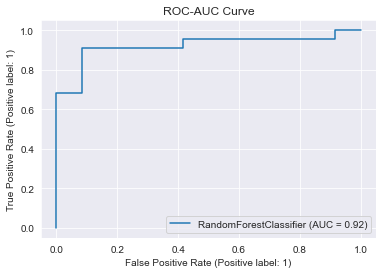

In [73]:
#ROC AUC PLOT
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,xtest,ytest)
plt.title('ROC-AUC Curve')
plt.show()

AUC score is 92%,so it is preety good score.

In [74]:
#SAVING THE BEST MODEL
import joblib
joblib.dump(gcv.best_estimator_,'titanic_train.pk1')

['titanic_train.pk1']